In [1]:
import numpy as np
import PIL.Image as Im
import matplotlib.pyplot as plt
import scipy.io
import scipy.ndimage
import math

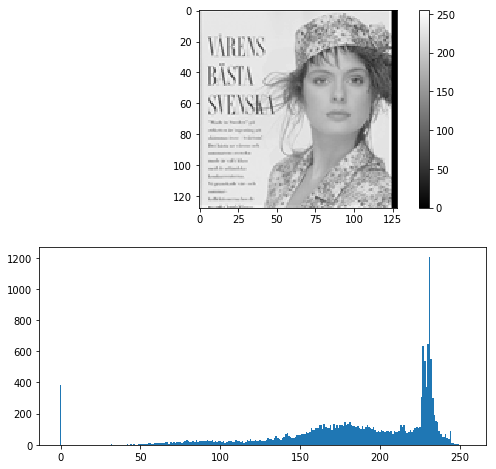

In [2]:
binvect = np.arange(255)
clic = scipy.io.loadmat('lab3files/clic.mat')['clic']
histo, bing = np.histogram(clic.flatten(), bins=binvect)
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.imshow(clic, vmin=0, vmax=255, cmap='gray')
plt.colorbar()
plt.subplot(212)
plt.bar(binvect[:-1], histo, 1);

## Question 1
The image is bright, there are more higher valued pixel

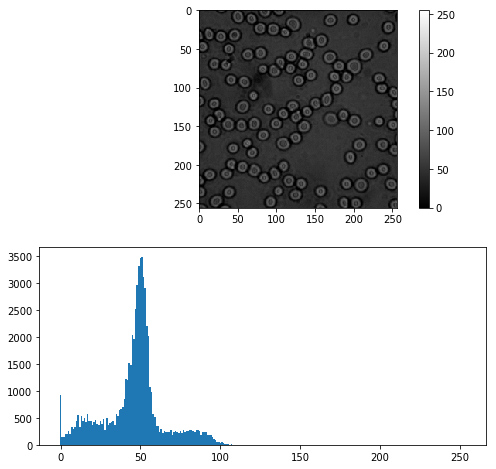

In [3]:
binvect = np.arange(255)
clic = scipy.io.loadmat('lab3files/blod256.mat')['blod256']
histo, bing = np.histogram(clic.flatten(), bins=binvect)
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.imshow(clic, vmin=0, vmax=255, cmap='gray')
plt.colorbar()
plt.subplot(212)
plt.bar(binvect[:-1], histo, 1);

## Question 2
The image is dark, there are more lower valued pixels

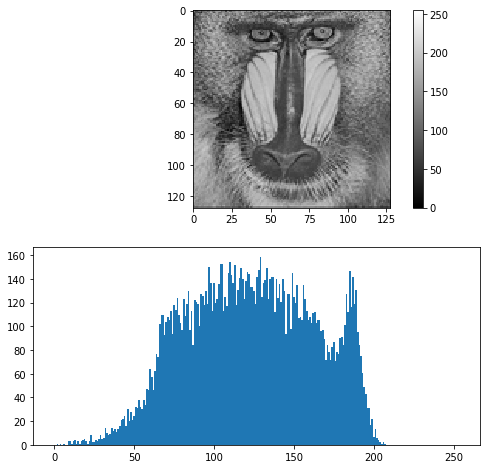

In [4]:
binvect = np.arange(255)
clic = np.array(Im.open('lab3files/baboon.tif'))
histo, bing = np.histogram(clic.flatten(), bins=binvect)
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.imshow(clic, vmin=0, vmax=255, cmap='gray')
plt.colorbar()
plt.subplot(212)
plt.bar(binvect[:-1], histo, 1);

## Question 3
The histogram is relatively flat

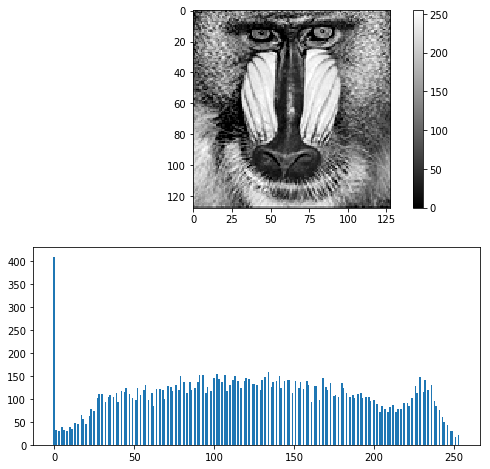

In [5]:
binvect = np.arange(255)
clic = np.array(Im.open('lab3files/baboon.tif'))
imT = 1.7 * clic - 85
imT[imT < 0] = 0
imT[imT > 255] = 255
histo, bing = np.histogram(imT, bins=binvect)
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.imshow(imT, vmin=0, vmax=255, cmap='gray')
plt.colorbar()
plt.subplot(212)
plt.bar(binvect[:-1], histo, 1);

## Question 4
$A = 1.7$, $B = 85$

## Question 5
All values $<50$ in the original image is negative, thus set to zero

## Question 6
#### Dilation
Make things bigger to fill in gaps

#### Erosion
Erode edges to remove protruding elements

## Question 7
There are boxes, and then more boxes, and then more boxes

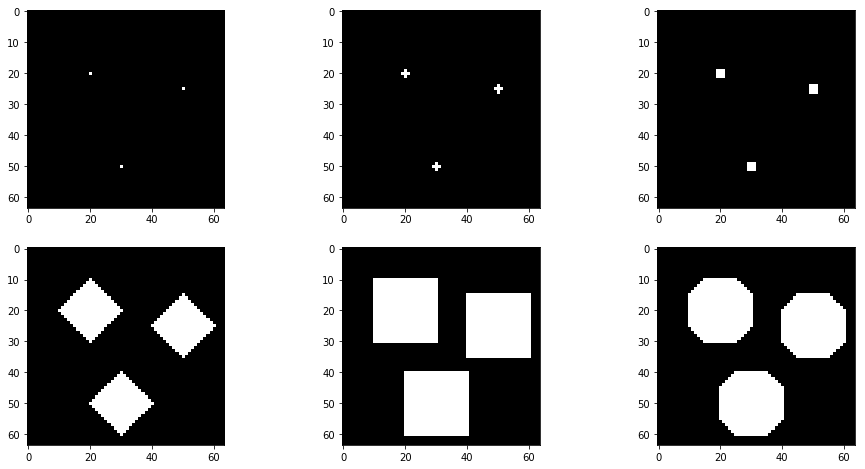

In [6]:
im = np.zeros((64,64))
im[20, 20] = 1
im[50, 30] = 1
im[25, 50] = 1
SE4 = np.array(((0,1,0), (1,1,1), (0,1,0)))
Im_d4 = scipy.ndimage.binary_dilation(im, SE4)
plt.figure(figsize=(16,8))
plt.subplot(231)
plt.imshow(im, cmap='gray')

plt.subplot(232)
plt.imshow(Im_d4, cmap='gray')

SE8 = np.array(((1,1,1), (1,1,1), (1,1,1)))
Im_d8 = scipy.ndimage.binary_dilation(im, SE8)
plt.subplot(233)
plt.imshow(Im_d8, cmap='gray')

Im_d4_10 = scipy.ndimage.binary_dilation(im, SE4, iterations=10)
Im_d8_10 = scipy.ndimage.binary_dilation(im, SE8, iterations=10)

plt.subplot(234)
plt.imshow(Im_d4_10, cmap='gray')

plt.subplot(235)
plt.imshow(Im_d8_10, cmap='gray')

Im_doct_5 = scipy.ndimage.binary_dilation(im, SE4, iterations=5)
Im_doct_5 = scipy.ndimage.binary_dilation(Im_doct_5, SE8, iterations=5)

plt.subplot(236)
plt.imshow(Im_doct_5, cmap='gray')


## Question 8
$d^{(oct)}$

In [7]:
SE8 = np.array(((1,1,1), (1,1,1), (1,1,1)))
SE4 = np.array(((0,1,0), (1,1,1), (0,1,0)))
def dilate_oct(im, iterations):
    im_doct = scipy.ndimage.binary_dilation(im, SE4, iterations=iterations)
    im_doct = scipy.ndimage.binary_dilation(im_doct, SE8, iterations=iterations)
    return im_doct

def erode_oct(im, iterations):
    im_doct = scipy.ndimage.binary_erosion(im, SE4, iterations=iterations)
    im_doct = scipy.ndimage.binary_erosion(im_doct, SE8, iterations=iterations)
    return im_doct

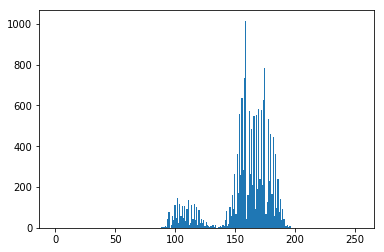

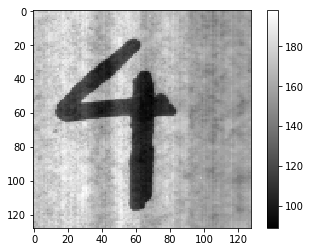

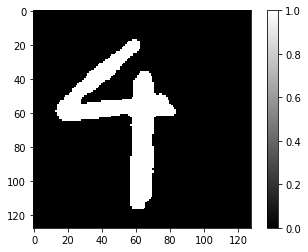

In [8]:
nuf4b = scipy.io.loadmat('lab3files/nuf4b.mat')['nuf4b']
binvect = np.arange(255)
histo, bing = np.histogram(nuf4b, bins=binvect)
plt.bar(binvect[:-1], histo, 1)

nuf4bT = nuf4b.copy()
nuf4bT[nuf4bT < 130] = 1
nuf4bT[nuf4bT >= 130] = 0

plt.figure()
plt.imshow(nuf4b, cmap='gray')
plt.colorbar()

plt.figure()
plt.imshow(nuf4bT, cmap='gray')
plt.colorbar()

## Question 9
The histogram is used to find the two normal distributions corresponding to background and foreground

$T = 130$

## Question 10
Dilation and erosion

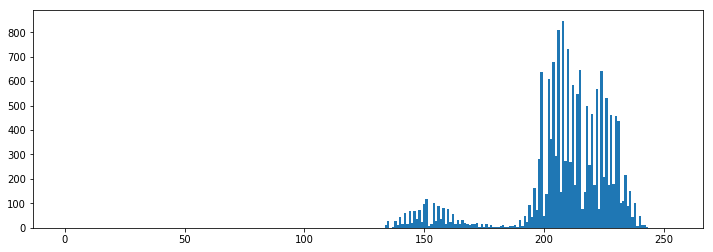

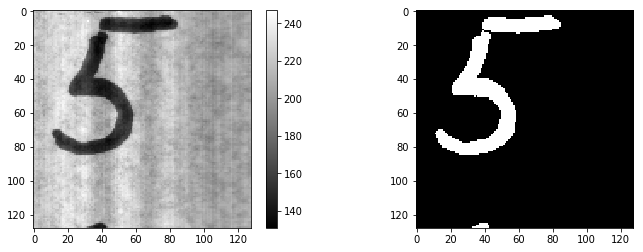

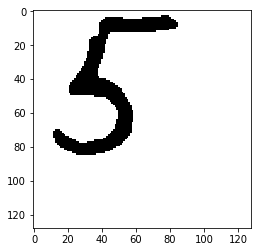

In [9]:
nuf5 = scipy.io.loadmat('lab3files/nuf5.mat')['nuf5']
binvect = np.arange(255)
histo, bing = np.histogram(nuf5, bins=binvect)
plt.figure(figsize=(12,4))
plt.bar(binvect[:-1], histo, 1)

nuf5T = nuf5.copy()
nuf5T[nuf5T < 180] = 1
nuf5T[nuf5T >= 180] = 0

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.imshow(nuf5, cmap='gray')
plt.colorbar()

plt.subplot(122)
plt.imshow(nuf5T, cmap='gray')

plt.figure(figsize=(12,4))
im_er = erode_oct(nuf5T, 1)
im_dil = dilate_oct(im_er, 2)
im = erode_oct(im_dil, 1)
plt.subplot(121)
plt.imshow(im, cmap='binary')

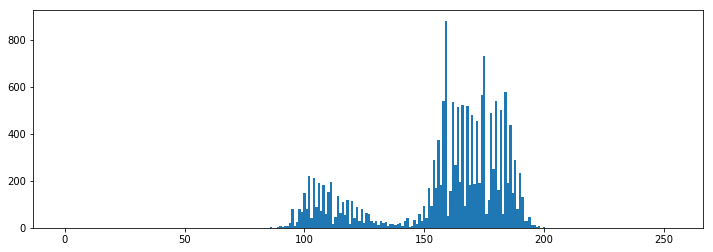

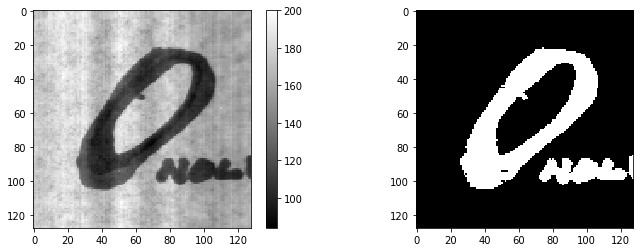

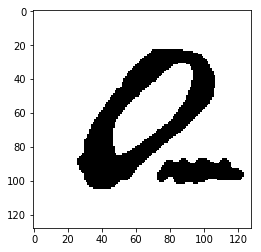

In [10]:
nuf0a = scipy.io.loadmat('lab3files/nuf0a.mat')['nuf0a']
binvect = np.arange(255)
histo, bing = np.histogram(nuf0a, bins=binvect)
plt.figure(figsize=(12,4))
plt.bar(binvect[:-1], histo, 1)

nuf0aT = nuf0a.copy()
nuf0aT[nuf0aT < 130] = 1
nuf0aT[nuf0aT >= 130] = 0

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.imshow(nuf0a, cmap='gray')
plt.colorbar()

plt.subplot(122)
plt.imshow(nuf0aT, cmap='gray')

plt.figure(figsize=(12,4))
im_er = erode_oct(nuf0aT, 1)
im_dil = dilate_oct(im_er, 2)
im = erode_oct(im_dil, 1)
plt.subplot(121)
plt.imshow(im, cmap='binary')

## Question 11
$T = 180$

Erosion, dilation x 2, erosion (We wanted to see if we could remove the small dot at the bottom of image)

## Question 12

$T = 130$

Erosion, dilation x 2, erosion

## Question 13
Page 31 & 37

In [11]:
import matlab.engine
eng = matlab.engine.start_matlab()

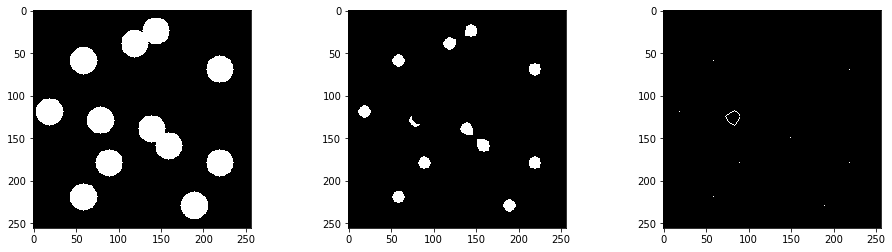

In [12]:
from skimage.morphology import thin, skeletonize
im_c = np.array(Im.open('lab3files/circles.tif'))
im_e = im_e = erode_oct(im_c,4)

plt.figure(figsize=(16,4))
plt.subplot(131)
plt.imshow(im_c, cmap='gray')

plt.subplot(132)
plt.imshow(im_e, cmap='gray')

plt.subplot(133)
im_c_m = matlab.double(im_c.tolist())
im_s = eng.bwmorph(im_c_m,"shrink", eng.inf())
plt.imshow(im_s, cmap='gray')

## Question 14
Erosion

## Question 15
They are filled object completely encapsulating a hole

## Question 16
Slides 36 & 38 

## Question 17
a 8-connective skeleton can have diagonals

## Question 18
No




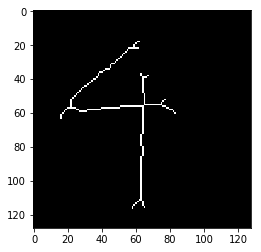

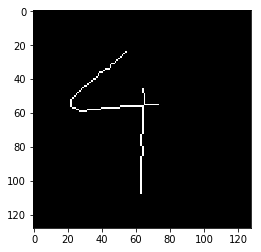

In [13]:
nuf4b_m = matlab.double(nuf4bT.tolist())
im_skel = eng.bwmorph(nuf4b_m, 'skel', eng.inf())
plt.imshow(im_skel, cmap='gray')

im_skel_p = eng.bwmorph(im_skel, 'shrink', 5)

plt.figure()
plt.imshow(im_skel_p, cmap='gray')

## Question 19
8-connective

## Question 20
Yes this is not a question but a task

## Question 21
5

## Question 22
Slide 28

## Question 23
$$
\small\left(\begin{matrix}1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 0\end{matrix}\right)
\left(\begin{matrix}0 & 1 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 0\end{matrix}\right)
\left(\begin{matrix}0 & 0 & 1 \\ 0 & 1 & 0 \\ 0 & 0 & 0\end{matrix}\right)
\left(\begin{matrix}0 & 0 & 0 \\ 0 & 1 & 1 \\ 0 & 0 & 0\end{matrix}\right)
\left(\begin{matrix}0 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1\end{matrix}\right)
\left(\begin{matrix}0 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 1 & 0\end{matrix}\right)
\large\left(\begin{matrix}0 & 0 & 0 \\ 0 & 1 & 0 \\ 1 & 0 & 0\end{matrix}\right)
\small\left(\begin{matrix}0 & 0 & 0 \\ 1 & 1 & 0 \\ 0 & 0 & 0\end{matrix}\right)
$$

## Question 24
The seventh one in the list of elements above (The big one)

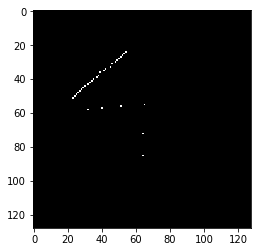

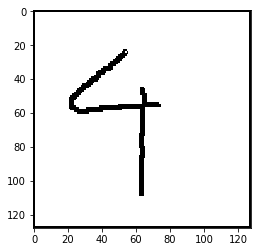

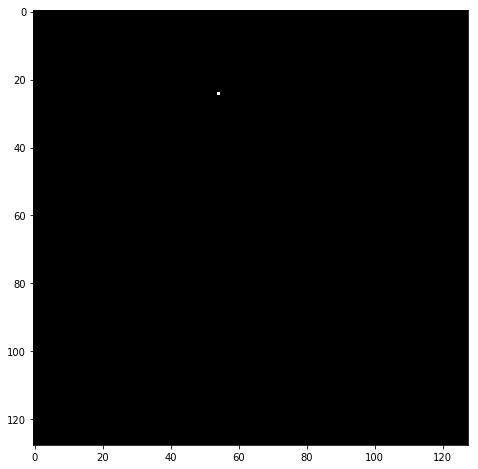

In [14]:
NE8 = np.array(((0, 0, 0), 
                (0, 1, 0), 
                (1, 0, 0)))
NE8_C = np.array(((1, 1, 1), 
                  (1, 0, 1), 
                  (0, 1, 1)))
im_skel_p_c = np.invert(im_skel_p)

im1 = scipy.ndimage.binary_erosion(im_skel_p, NE8)
im2 = scipy.ndimage.binary_erosion(im_skel_p_c, NE8_C)
hom = im1 * im2
plt.figure()
plt.imshow(im1, cmap='gray')
plt.figure()
plt.imshow(im2, cmap='gray')
plt.figure(figsize=(16,8))
plt.imshow(hom, cmap='gray')

y = np.where(hom==1)[0][0]
x = np.where(hom==1)[1][0]

In [15]:
def track10(im, y, x):
    xout = x
    yout = y
    for k in range(10):
        print("y = {}, x = {}".format(yout, xout))
        roi = im[y-1:y+2, x-1:x+2]
        roi[1,1] = 0
        if k > 1:
            roi[2-ypos][2-xpos] = 0
        wh = np.where(roi==1)
        xpos, ypos = (wh[1][0], wh[0][0])
        xout = xout + xpos - 1
        yout = yout + ypos - 1
    return yout, xout

y10, x10 = track10(np.array(im_skel_p),y, x)
math.degrees(math.atan2(x-x10, y-y10))

y = 24, x = 54
y = 25, x = 53
y = 26, x = 52
y = 27, x = 51
y = 28, x = 50
y = 29, x = 49
y = 30, x = 48
y = 31, x = 47
y = 32, x = 46
y = 33, x = 45


135.0

## Question 25
$135^\circ$

## Question 26
Not done

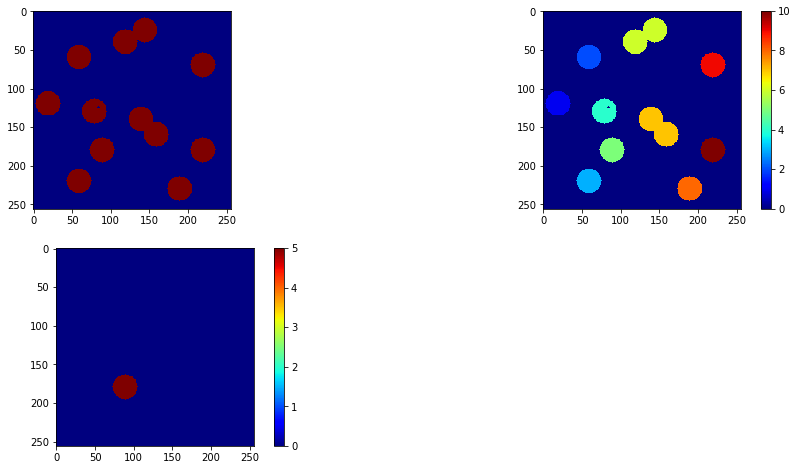

In [16]:
cc = eng.bwconncomp(matlab.double(im_c.tolist()))
im_label = eng.labelmatrix(cc)
plt.figure(figsize=(16,8))
plt.subplot(221)
plt.imshow(im_c, cmap='jet')

plt.subplot(222)
plt.imshow(im_label, cmap='jet')
plt.colorbar()

plt.subplot(223)
im_label_f = [item for sublist in im_label for item in sublist]
im_label_t = np.array(im_label_f)
im_label_t[im_label_t != 5] = 0
im_label_b = np.array(im_label_t).reshape((256,-1))
plt.imshow(im_label_b, cmap='jet')
plt.colorbar()

## Question 27
$0-10$

## Question 28
$0$

## Question 29
left to right (top to bottom if equals?)

## Question 30
```matlab
im_label_t(im_label_t != 5) = 0
```

In [17]:
unique, counts = np.unique(np.array(im_label_f), return_counts=True)
sizes = list(zip(unique,counts))[1:]
print(sizes)
print(np.argmax(list(zip(*sizes))[1])+1) # +1 because zero indexing

[(1, 797), (2, 797), (3, 797), (4, 792), (5, 797), (6, 1570), (7, 1557), (8, 797), (9, 797), (10, 797)]
6


## Question 31
The sixth object (Yellow)

Text(0.5, 1.0, 'Chessboard')

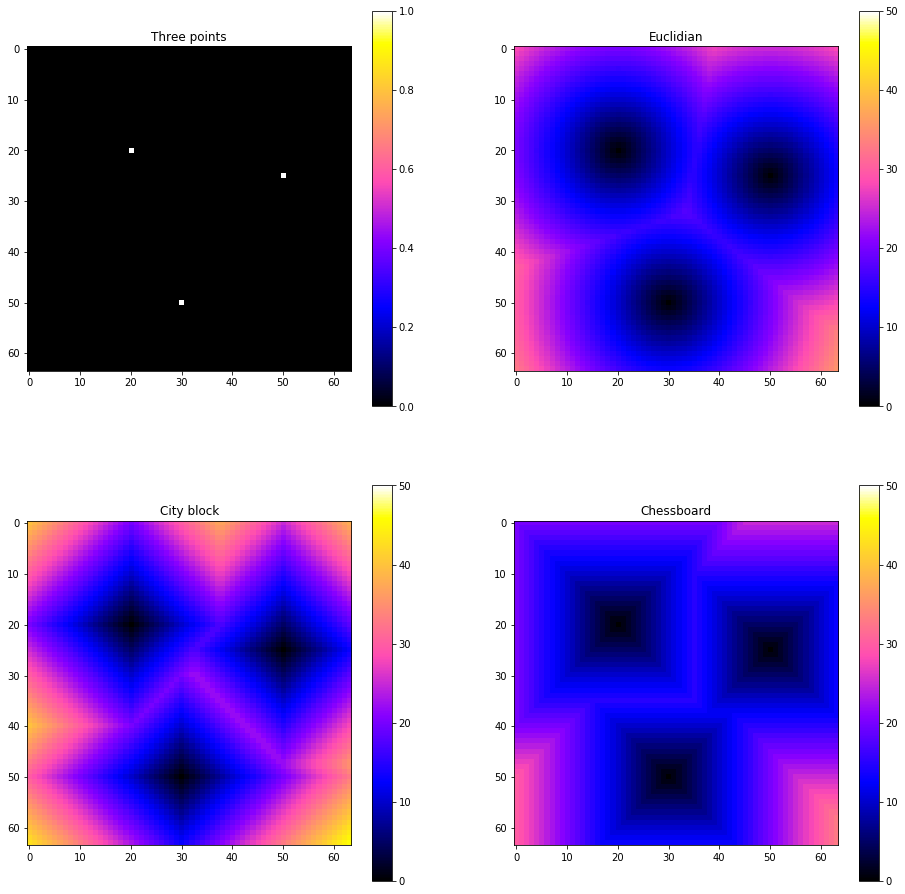

In [18]:
import scipy.ndimage
im = np.zeros((64,64),dtype=np.uint8)
im[20, 20] = 1
im[50, 30] = 1
im[25, 50] = 1
#im_eq = scipy.ndimage.distance_transform_edt(im)
im_eq = eng.bwdist(matlab.double(im.tolist()))

plt.figure(figsize=(16,16))
plt.subplot(221)
c = eng.colorcube
plt.imshow(im, cmap='gnuplot2')
plt.colorbar()
plt.title('Three points')

plt.subplot(222)
plt.imshow(im_eq, vmin=0, vmax=50, cmap='gnuplot2')
plt.colorbar()
plt.title('Euclidian')

im_cb = eng.bwdist(matlab.double(im.tolist()), 'cityblock')
plt.subplot(223)
plt.imshow(im_cb, vmin=0, vmax=50, cmap='gnuplot2')
plt.colorbar()
plt.title('City block')

im_chb = eng.bwdist(matlab.double(im.tolist()), 'chessboard')
plt.subplot(224)
plt.imshow(im_chb, vmin=0, vmax=50, cmap='gnuplot2')
plt.colorbar()
plt.title('Chessboard')

## Question 32
Image 1, 3 and 4 have intergers, image 2 has real values.

$$d^{(4)} \rightarrow cityblock$$
$$d^{(8)} \rightarrow chessboard$$

Text(0.5, 1.0, 'Inside distance')

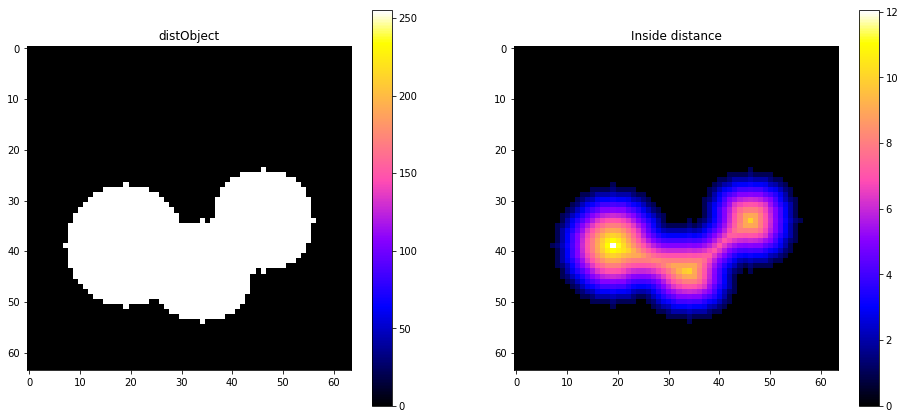

In [19]:
im_d = Im.open('lab3files/distObject.tif')
plt.figure(figsize=(16,16))
plt.subplot(221)
plt.imshow(im_d, cmap='gnuplot2')
plt.colorbar()
plt.title('distObject')

im_d_i = np.invert(im_d)
im_d_i_eq = eng.bwdist(matlab.double(im_d_i.tolist()))
plt.subplot(222)
plt.imshow(im_d_i_eq, cmap='gnuplot2')
plt.colorbar()
plt.title('Inside distance')

## Question 33
Invert the image

## Question 34
$$maxDist = 12$$
$$maxThick >= 2 \times maxDist$$


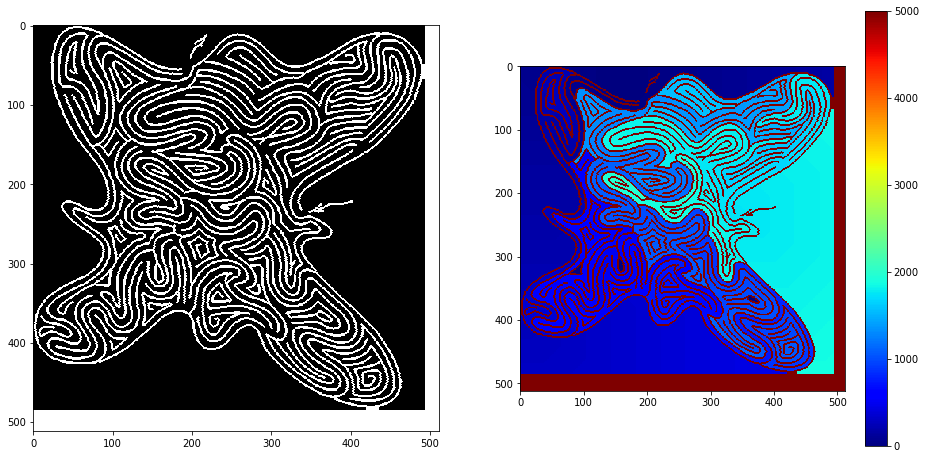

In [20]:
im = np.array(Im.open("lab3files/labyrinth1.tif"))
maxiter = 5000
maxval = 5000
dist_im = maxval * im
temp1 = 0 * im
temp1[20,160] = 1

for k in range(maxiter):
    temp2 = dilate_oct(temp1, 1)
    temp2 = temp2 * np.invert(im)
    dist_im = dist_im + k*(temp2^temp1)
    temp1 = temp2
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.imshow(im, cmap="gray")
plt.subplot(122)
plt.imshow(dist_im, vmin=0, vmax=maxval, cmap="jet")
plt.colorbar()

## Question 36
It follows the available path and gets a higher and higer value (distance from start)

In [ ]:
import io
#out = io.StringIO()
err = io.StringIO()
test = eng.trackDist(matlab.double(im.tolist()), matlab.double(dist_im.tolist()), 230, 400, stderr=err)
#print(out.getvalue())
print(err.getvalue())


TypeError: Image data cannot be converted to float

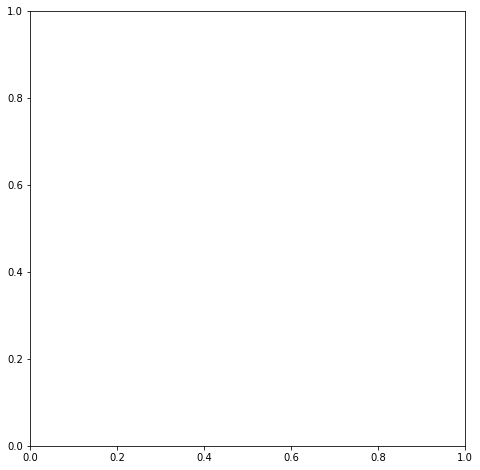

In [22]:
plt.figure(figsize=(16,8))
plt.imshow(test, cmap=('jet'))